In [74]:
# Import the Dependencies


import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Printing stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Load the dataset to a pandas dataframe
news_dataset = pd.read_csv('train.csv')

In [ ]:
# Check the number of rows and columns
news_dataset.shape

(20800, 5)

In [ ]:
# Print the first 5 rows of this dateframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# Checking for missing values
news_dataset.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
# Replacing null values with empty strings
news_dataset = news_dataset.fillna('')

In [ ]:
# Merging the author name and news tite
news_dataset['content'] = news_dataset['author']+ ''+ news_dataset['title']

In [ ]:
print(news_dataset['content'])

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# Separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

          id  ...                                            content
0          0  ...  Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1          1  ...  Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2          2  ...  Consortiumnews.comWhy the Truth Might Get You ...
3          3  ...  Jessica Purkiss15 Civilians Killed In Single U...
4          4  ...  Howard PortnoyIranian woman jailed for fiction...
...      ...  ...                                                ...
20795  20795  ...  Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796  20796  ...  Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797  20797  ...  Michael J. de la Merced and Rachel AbramsMacy’...
20798  20798  ...  Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799  20799  ...             David SwansonWhat Keeps the F-35 Alive

[20800 rows x 5 columns]
0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 2080

In [ ]:
# Stemming Procedure
port_stem = PorterStemmer()

In [ ]:
def steming(content):
  stemmed_content = re.sub('[^a-zA-z]','', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ''.join(stemmed_content)
  return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(steming)

In [ ]:
print(news_dataset['content'])

0        darrelllucushousedemaidewedidntevenseecomeysle...
1        danieljflynnflynnhillaryclintonbigwomanoncampu...
2               consortiumnewscomwhythetruthmightgetyoufir
3        jessicapurkisscivilianskilledinsingleusairstri...
4        howardportnoyiranianwomanjailedforfictionalunp...
                               ...                        
20795    jeromehudsonrappertitrumpaposterchildforwhites...
20796    benjaminhoffmannflplayoffsschedulematchupsando...
20797    michaeljdelamercedandrachelabramsmacysissaidto...
20798    alexansarynatorussiatoholdparallelexercisesinb...
20799                          davidswansonwhatkeepsthefal
Name: content, Length: 20800, dtype: object


In [ ]:
# Create X and Y
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
print(X)
print(Y)

['darrelllucushousedemaidewedidntevenseecomeysletteruntiljasonchaffetztweetedit'
 'danieljflynnflynnhillaryclintonbigwomanoncampusbreitbart'
 'consortiumnewscomwhythetruthmightgetyoufir' ...
 'michaeljdelamercedandrachelabramsmacysissaidtoreceivetakeoverapproachbyhudsonsbaythenewyorktim'
 'alexansarynatorussiatoholdparallelexercisesinbalkan'
 'davidswansonwhatkeepsthefal']
[1 0 1 ... 0 1 1]


In [ ]:
Y.shape


(20800,)

In [ ]:
# Converting textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 5210)	1.0
  (1, 4898)	1.0
  (2, 4551)	1.0
  (3, 9761)	1.0
  (4, 7983)	1.0
  (5, 4996)	1.0
  (6, 12013)	1.0
  (7, 1010)	1.0
  (8, 6809)	1.0
  (9, 12909)	1.0
  (10, 85)	1.0
  (11, 4203)	1.0
  (12, 1165)	0.72122843239707
  (12, 15651)	0.6926972991877945
  (13, 9115)	1.0
  (14, 1697)	1.0
  (15, 8745)	1.0
  (16, 13043)	1.0
  (17, 17480)	1.0
  (18, 18140)	1.0
  (19, 9289)	1.0
  (20, 14194)	1.0
  (21, 9671)	1.0
  (22, 15118)	1.0
  (23, 12718)	1.0
  :	:
  (20775, 1823)	1.0
  (20776, 8939)	1.0
  (20777, 409)	1.0
  (20778, 14005)	1.0
  (20779, 18541)	1.0
  (20780, 4167)	1.0
  (20781, 7757)	1.0
  (20782, 18172)	1.0
  (20783, 3728)	1.0
  (20784, 5554)	1.0
  (20785, 1572)	1.0
  (20786, 7472)	1.0
  (20787, 8253)	1.0
  (20788, 9871)	1.0
  (20789, 19697)	1.0
  (20790, 288)	1.0
  (20791, 4865)	1.0
  (20792, 10248)	1.0
  (20793, 16444)	1.0
  (20794, 11876)	1.0
  (20795, 9686)	1.0
  (20796, 2366)	1.0
  (20797, 13154)	1.0
  (20798, 890)	1.0
  (20799, 5476)	1.0


In [ ]:
# Splitting the dataset training & testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
# Training the model: Logistic regression model
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Evaluation - accuracy score
# Accuracy_score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.9927283653846154


In [ ]:
# Evaluation - Accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accurcay score of the testing data:', test_data_accuracy)

Accurcay score of the testing data: 0.5377403846153846


In [ ]:
# Making a Prediction System
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is REAL')
else:
  print('The news is FAKE')

[0]
The news is REAL


In [ ]:
print(Y_test[3])

0


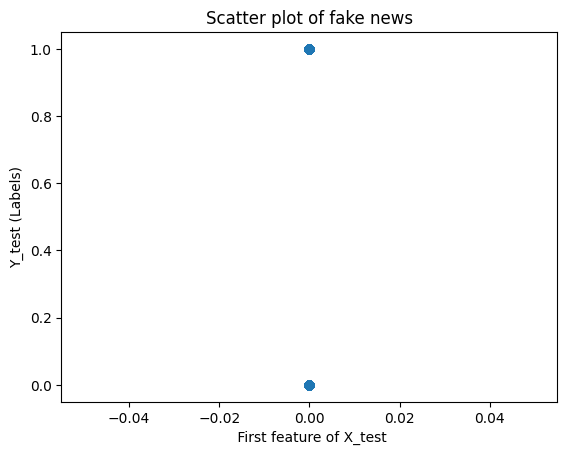

In [ ]:
# Plot the graph for fake news
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert X_test to a dense array & take first feature for plotting
X_test_dense =X_test.toarray()
X_test_plot = X_test_dense[:,0]

#Plotting the scatter plot
plt.scatter(X_test_plot,Y_test)
plt.xlabel(' First feature of X_test')
plt.ylabel('Y_test (Labels)')
plt.title('Scatter plot of fake news')
plt.show()


In [75]:
# Training rhe model using Decision Tree
model = DecisionTreeClassifier()

In [77]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [78]:
# Evaluate the accuracy score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [79]:
print('Accurcay score for training data:', training_data_accuracy)

Accurcay score for training data: 1.0


In [80]:
# Evaluate the accuracy score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [81]:
print("Accuracy score for testing data:", test_data_accuracy)

Accuracy score for testing data: 0.5012019230769231


NameError: name 'SVM' is not defined